Bienvenido a la calculadora de opciones en forma de condor
¿Quiéres una estrategia de compra o de venta?: compra
compra
Estrategia elegida: compra
Introdice el precio spot: 345
345.0
Introduce el precio strike long call: 345
345.0
Introduce el precio premium long call: 345
345.0
Introduce el precio short call: 345
345.0
Introduce el precio premium short call: 345
345.0
Introduce el precio del long put: 345
345.0
Introdice el premium long put: 345
345.0
Introduce el precio del short put: 345
345.0
Introduce el premium short put: 345
345.0


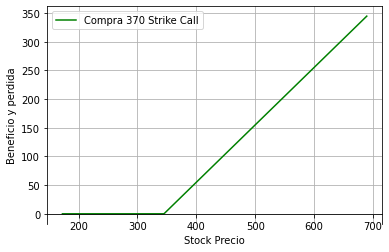

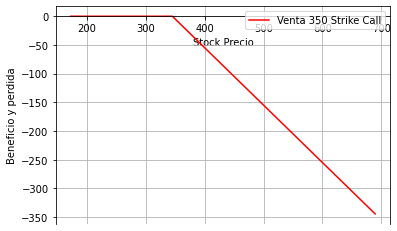

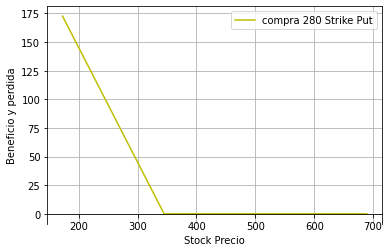

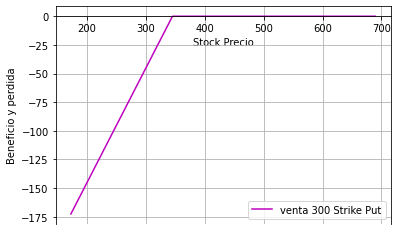

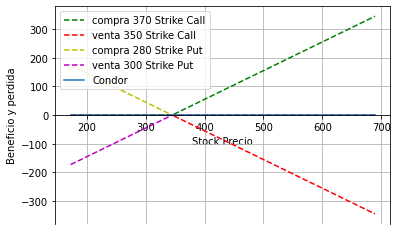

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
########### Estrategia Condor###################
#valores usados para el ejemplo:323 precio spot , precio strike long call: 370,precio premium long call: 1 precio short call: 350 precio premium short call: 3 precio del long put: 280 premium long put: 1  precio del short put: 300 premium short put: 3
print("Bienvenido a la calculadora de opciones en forma de condor")
tipo_estrategia=input("¿Quiéres una estrategia de compra o de venta?: ")
print(tipo_estrategia)
tipo=tipo_estrategia.lower()
if tipo in ("compra", "venta"):
  print("Estrategia elegida: " + tipo)
else:
  print("La estrategia seleccionada no está disponible.")

####empezamos con la estrategia compradora#######
#######             CALL  PAYOFF             ##################
#primero definimos la variable del payoff del CALL#######
def call_payoff(sT, strike_price, premium):
  return np.where(sT > strike_price, sT - strike_price, 0)
#precio  de stock#
spot_price=float(input("Introdice el precio spot: "))
print(spot_price)
#long call#
strike_price_long_call=float(input("Introduce el precio strike long call: "))
print(strike_price_long_call)
premium_long_call=float(input("Introduce el precio premium long call: "))
print(premium_long_call)
#short call#
strike_price_short_call=float(input("Introduce el precio short call: "))
print(strike_price_short_call)
premium_short_call=float(input("Introduce el precio premium short call: "))
print(premium_short_call)
#stock precio de expiracion del call#
sT = np.arange(0.5*spot_price,2*spot_price,1)
payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)

#######             PUT PAYOFF             ##################
########segundo definimos la variable del payoff del PUT#######
def put_payoff(sT, strike_price, premium):
  return np.where(sT < strike_price, strike_price - sT, 0)
# Long put
strike_price_long_put=float(input("Introduce el precio del long put: "))
print(strike_price_long_put)
premium_long_put=float(input("Introdice el premium long put: "))
print(premium_long_put)
# Short put
strike_price_short_put=float(input("Introduce el precio del short put: "))
print(strike_price_short_put)
premium_short_put=float(input("Introduce el premium short put: "))
print(premium_short_put)
# Stock precio expiracion del put
sT = np.arange(0.5*spot_price,2*spot_price,1)
payoff_long_put = put_payoff(sT, strike_price_long_put, premium_long_put)

############################################################################ GRAFICOS ####################################################
################ CALL ############################
###############graficamos la compra del call##################

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Compra 370 Strike Call',color='g')
plt.xlabel('Stock Precio')
plt.ylabel('Beneficio y perdida')
plt.legend()

plt.grid()
plt.show()
###############graficamos la venta del call###############
payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Venta 350 Strike Call',color='r')
plt.xlabel('Stock Precio')
plt.ylabel('Beneficio y perdida')
plt.legend()
plt.grid()
plt.show()
################ PUT ############################
##########graficamos la compra del put#########
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_put,label='compra 280 Strike Put',color='y')
plt.xlabel('Stock Precio')
plt.ylabel('Beneficio y perdida')
plt.legend()
plt.grid()
plt.show()
############graficamos la venta del put#########
payoff_short_put = put_payoff(sT, strike_price_short_put, premium_short_put) * -1.0

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_put,label='venta 300 Strike Put',color='m')
plt.xlabel('Stock Precio')
plt.ylabel('Beneficio y perdida')
plt.legend()
plt.grid()
plt.show()
####estrategia completa grafico donde aparece la estrategia completa##############
payoff = payoff_long_call + payoff_short_call + payoff_long_put + payoff_short_put

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,'--',label='compra 370 Strike Call',color='g')
ax.plot(sT,payoff_short_call,'--',label='venta 350 Strike Call',color='r')
ax.plot(sT,payoff_long_put,'--',label='compra 280 Strike Put',color='y')
ax.plot(sT,payoff_short_put,'--',label='venta 300 Strike Put',color='m')
ax.plot(sT,payoff,label='Condor')
plt.xlabel('Stock Precio')
plt.ylabel('Beneficio y perdida')
plt.legend()
plt.grid()
plt.show()









